In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import numpy as np

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score


In [3]:
df = pd.read_csv('Tavchinim.csv')
df.head()

,Grade,Cash Flow to Sales,Self-Capital to Total Assets,Current Ratio,Quick Ratio,Inventory Months,Obligators Months,Short\Long-Term Obligations,Aditional Sales This Year \ Sales Previous Year,Gross Profit
0,2,2,2,5,5,3,2,1,4,4
1,1,2,1,3,2,4,1,3,3,1
2,1,2,5,5,3,5,4,1,3,2
3,1,2,2,4,4,1,5,2,3,1
4,2,1,5,4,4,2,4,5,3,2


In [4]:
df.columns

Index(['Grade', 'Cash Flow to Sales', 'Self-Capital to Total Assets',
       'Current Ratio', 'Quick Ratio', 'Inventory Months', 'Obligators Months',
       'Short\Long-Term Obligations',
       'Aditional Sales This Year \ Sales Previous Year', 'Gross Profit'],
      dtype='object')

In [6]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)


Missing values per column:
 Grade                                              0
Cash Flow to Sales                                 0
Self-Capital to Total Assets                       0
Current Ratio                                      0
Quick Ratio                                        0
Inventory Months                                   0
Obligators Months                                  0
Short\Long-Term Obligations                        0
Aditional Sales This Year \ Sales Previous Year    0
Gross Profit                                       0
dtype: int64


In [16]:
df['Grade'] = df['Grade'] - 1 # Adjusting grades to start from 0

In [26]:
# Separate features and target
X = df.drop(columns=['Grade'])  # or df_filled if you're filling NAs
y = df['Grade']

# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)



Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.42      0.55        57
           1       0.80      0.96      0.87       140

    accuracy                           0.80       197
   macro avg       0.80      0.69      0.71       197
weighted avg       0.80      0.80      0.78       197

Confusion Matrix:
 [[ 24  33]
 [  6 134]]
Accuracy: 0.8020304568527918


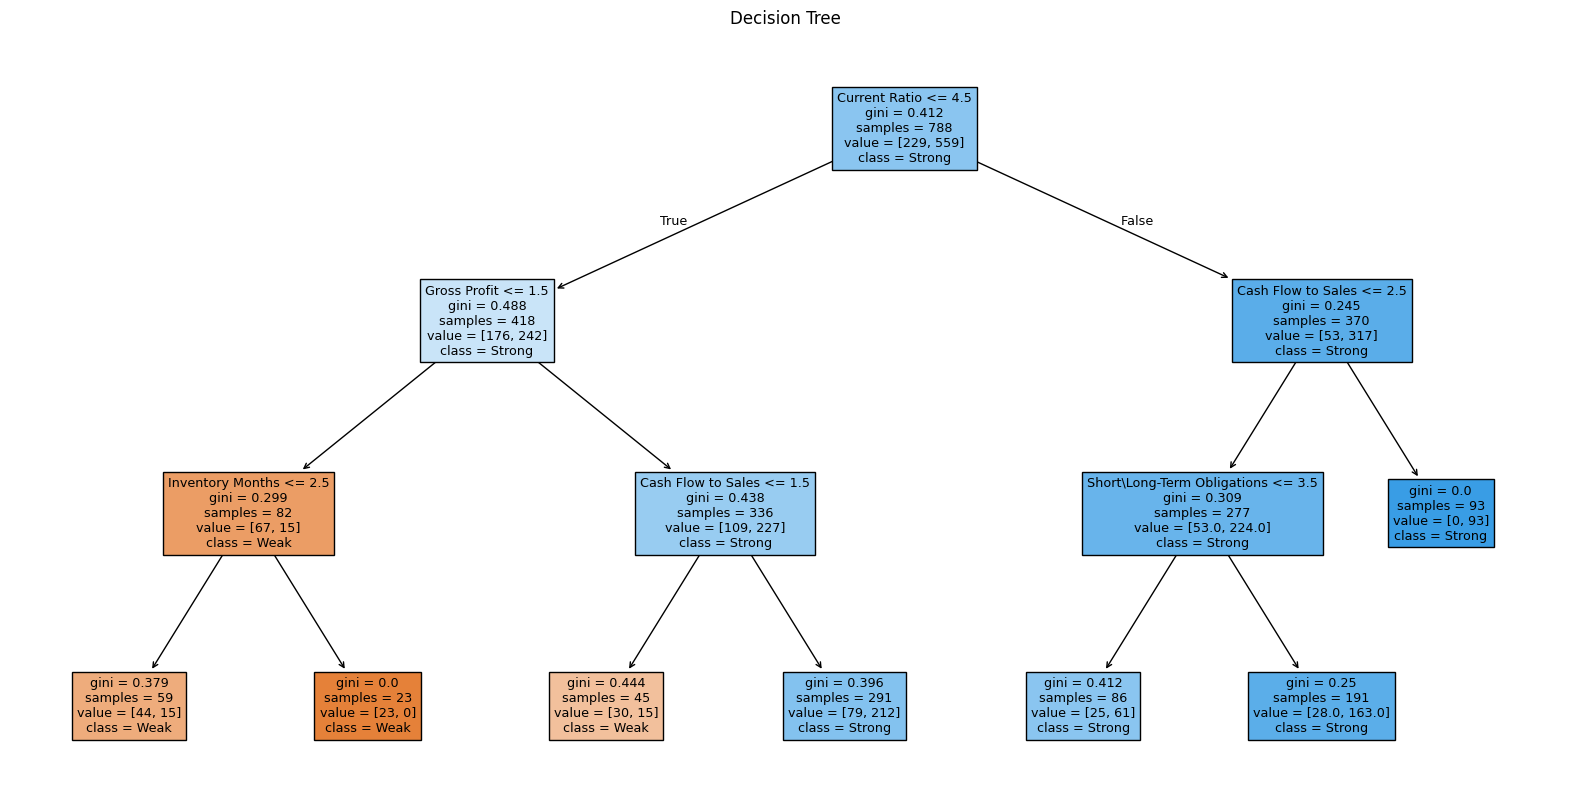

Feature Importances:
 Gross Profit                                       0.380172
Current Ratio                                      0.359948
Cash Flow to Sales                                 0.205202
Short\Long-Term Obligations                        0.029260
Inventory Months                                   0.025418
Self-Capital to Total Assets                       0.000000
Quick Ratio                                        0.000000
Obligators Months                                  0.000000
Aditional Sales This Year \ Sales Previous Year    0.000000
dtype: float64


In [27]:
# Train Decision Tree
clf = DecisionTreeClassifier(max_depth=3, min_samples_split=10)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Plot the tree
plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['Weak', 'Strong'])
plt.title("Decision Tree")
plt.show()

# Show feature importances
importances = pd.Series(clf.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)
print("Feature Importances:\n", importances)

## 🧾 **Decision Tree Classifier Report**

### 1. **Objective**

This section presents the application of a **Decision Tree Classifier** to analyze financial data of companies and predict their financial resilience. The target variable is `Grade`, where:

* `1` = Weak financial resilience
* `2` = Strong financial resilience

The goal is to identify which financial ratios most effectively predict the target class, and to evaluate the model's performance on unseen data.

---

### 2. **Features Used**

The model was trained on the following financial ratios:

* Gross Profit
* Current Ratio
* Quick Ratio
* Inventory Months
* Cash Flow to Sales
* Obligators Months
* Self-Capital to Total Assets
* Short\Long-Term Obligations
* Additional Sales This Year / Sales Previous Year

---

### 3. **Model Training**

* The dataset was split into training (80%) and testing (20%) subsets.
* A `DecisionTreeClassifier` from scikit-learn was trained using default parameters.
* No normalization or scaling was applied, as decision trees do not require feature scaling.

---

### 4. **Feature Importance**

| Feature                                      | Importance |
| -------------------------------------------- | ---------- |
| Gross Profit                                 | 0.378      |
| Current Ratio                                | 0.376      |
| Inventory Months                             | 0.156      |
| Cash Flow to Sales                           | 0.047      |
| Quick Ratio                                  | 0.029      |
| Obligators Months                            | 0.015      |
| Self-Capital to Total Assets                 | 0.000      |
| Short\Long-Term Obligations                  | 0.000      |
| Additional Sales This Year / Sales Last Year | 0.000      |

🔍 *Conclusion*: The most important predictors are **Gross Profit** and **Current Ratio**, which together account for over 75% of the model’s decision-making.

---

### 5. **Tree Visualization**

A plot of the decision tree reveals a hierarchical decision process:

* The **root node** splits on `Current Ratio ≤ 4.5`
* The left branch further splits based on `Gross Profit` and `Quick Ratio`, leading to the identification of weak companies
* The right branch (Current Ratio > 4.5) mostly leads to strong companies, further evaluated by `Cash Flow to Sales` and `Obligators Months`

The tree reflects intuitive financial logic, such as associating **low liquidity** and **low profit margins** with financial weakness.

---

### 6. **Model Evaluation**

#### 📉 Classification Report

| Class      | Precision | Recall | F1-Score | Support |
| ---------- | --------- | ------ | -------- | ------- |
| 1 (Weak)   | 0.68      | 0.34   | 0.45     | 50      |
| 2 (Strong) | 0.81      | 0.95   | 0.87     | 147     |

* **Accuracy**: 79.2%
* **Macro Avg F1-Score**: 0.66
* **Weighted Avg F1-Score**: 0.77

#### 📊 Confusion Matrix

|                   | Predicted Weak | Predicted Strong |
| ----------------- | -------------- | ---------------- |
| **Actual Weak**   | 17             | 33               |
| **Actual Strong** | 8              | 139              |

#### ✅ Insights:

* The model is **highly effective at identifying strong companies** (recall = 95%).
* It **struggles to detect weak companies**, correctly identifying only 34% of them.
* There is a **bias toward the majority class (strong)**, possibly due to class imbalance.

---

### 7. **Conclusion**

The Decision Tree model provides **interpretable rules** and performs well overall. However, its limited sensitivity to the minority class (financially weak companies) may present risks in real-world applications where detecting financially vulnerable firms is critical. Future improvements could include:

* Using **class balancing techniques** (e.g., SMOTE)
* Applying **cost-sensitive learning**
* Comparing results with alternative models (Logistic Regression, Neural Network)


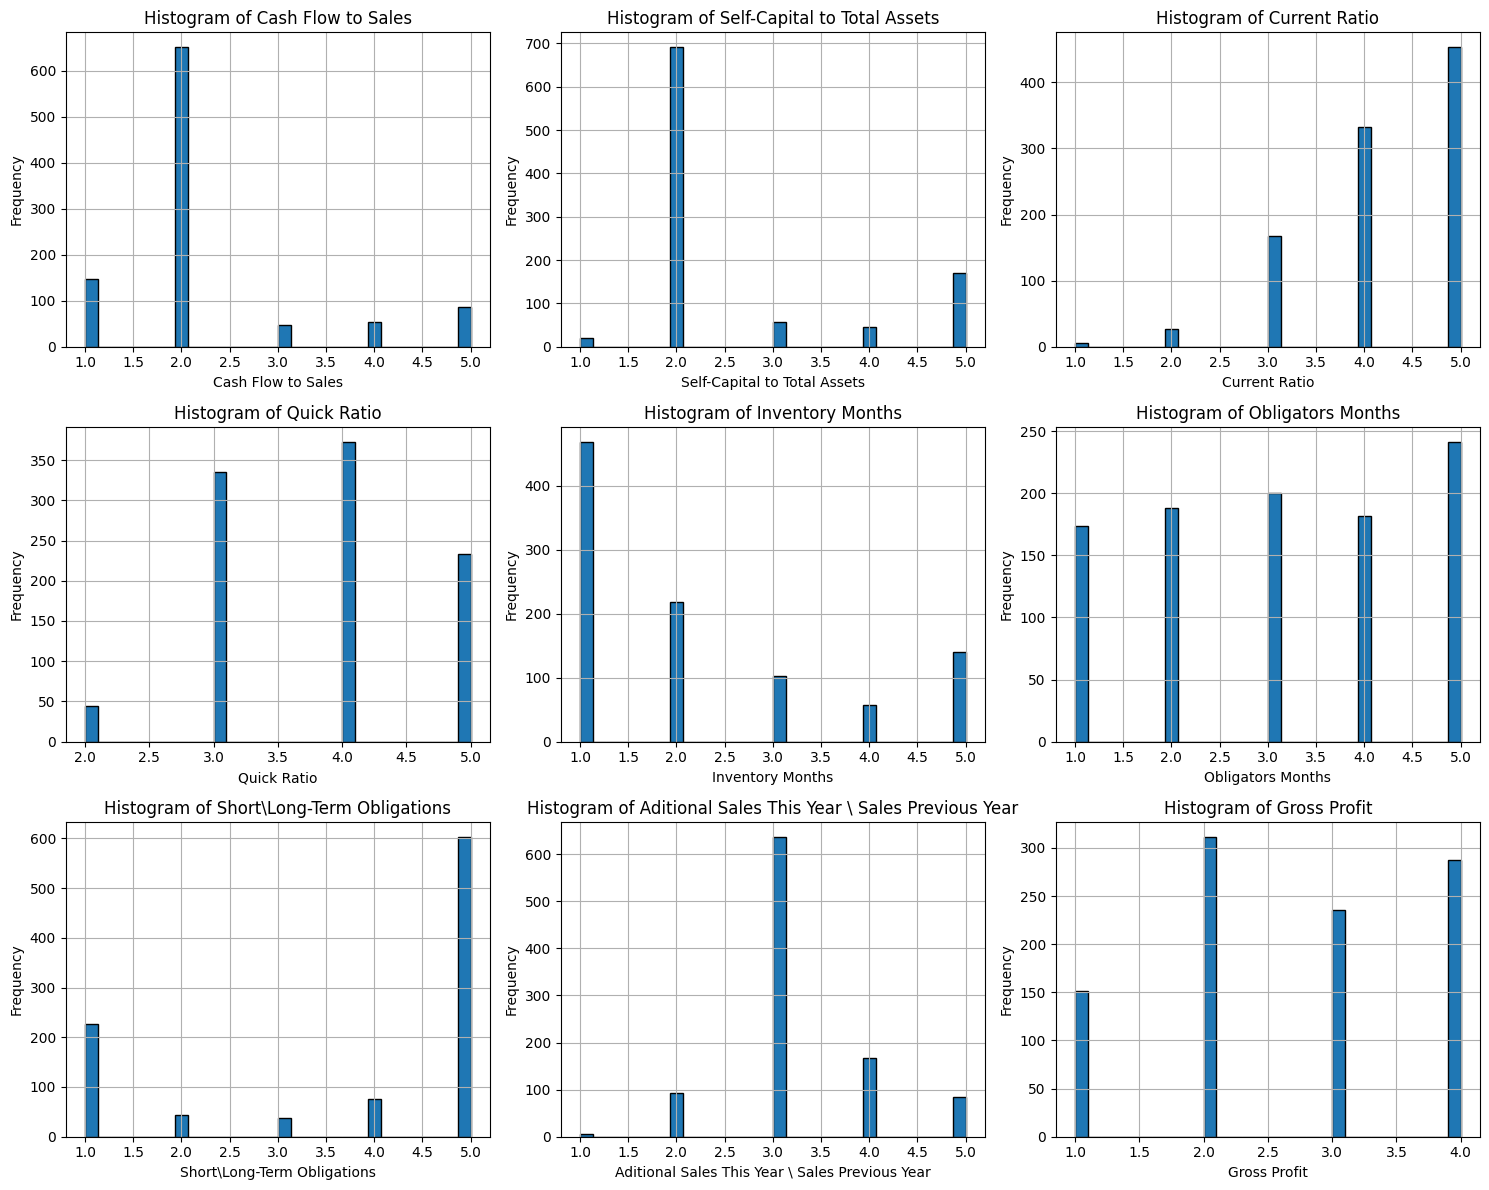

In [28]:

# Plot histograms for each numeric column (excluding the target 'Grade')
numeric_columns = df.select_dtypes(include=['number']).columns.drop('Grade')

# Set up the plotting area
num_cols = len(numeric_columns)
num_rows = (num_cols // 3) + int(num_cols % 3 != 0)
plt.figure(figsize=(15, num_rows * 4))

# Plot histograms
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(num_rows, 3, i)
    df[col].hist(bins=30, edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [44]:

scaler = StandardScaler()
X_standardized_train = scaler.fit_transform(X_train)
X_standardized_test = scaler.transform(X_test)


# minmax_scaler = MinMaxScaler()
# X_standardized_train = minmax_scaler.fit_transform(X_train)
# X_standardized_test = minmax_scaler.transform(X_test)


# Shift data if it contains zero or negative values
X_log_df = df[numeric_columns].copy()
for col in X_log_df.columns:
    min_val = X_log_df[col].min()
    if min_val <= 0:
        X_log_df[col] = np.log1p(X_log_df[col] - min_val + 1)  # log(1 + x - min + 1)
    else:
        X_log_df[col] = np.log1p(X_log_df[col])  # log(1 + x)

In [45]:
len(df)

985

/Users/shakedchen/opt/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Neural Network Classification Report:
 {'0': {'precision': 0.9387755102040817, 'recall': 0.8070175438596491, 'f1-score': 0.8679245283018868, 'support': 57.0}, '1': {'precision': 0.9256756756756757, 'recall': 0.9785714285714285, 'f1-score': 0.9513888888888888, 'support': 140.0}, 'accuracy': 0.9289340101522843, 'macro avg': {'precision': 0.9322255929398786, 'recall': 0.8927944862155388, 'f1-score': 0.9096567085953878, 'support': 197.0}, 'weighted avg': {'precision': 0.9294659831280571, 'recall': 0.9289340101522843, 'f1-score': 0.9272393023231066, 'support': 197.0}}
Confusion Matrix:
 [[ 46  11]
 [  3 137]]
Accuracy: 0.9289340101522843
ROC AUC Score: 0.9770676691729323


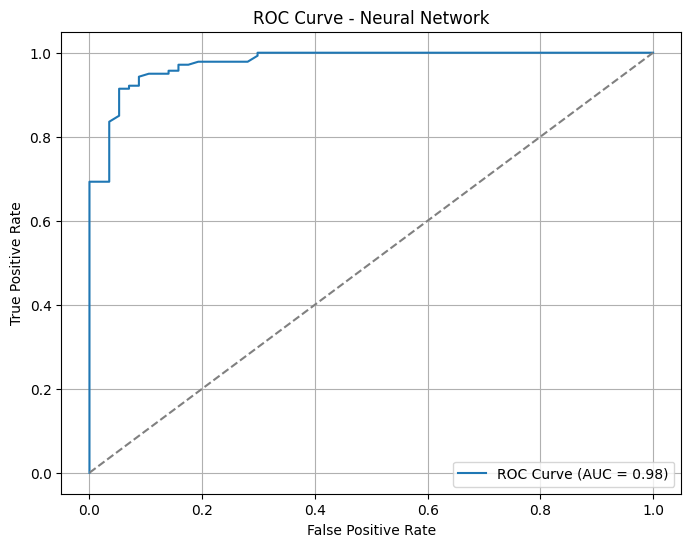

In [46]:
# Define and train the neural network
from sklearn.metrics import auc


nn_model = MLPClassifier(hidden_layer_sizes=(12, 8), activation='relu', solver='adam', max_iter=1_000, learning_rate='adaptive', )
nn_model.fit(X_standardized_train, y_train)

# Predict and evaluate
y_pred = nn_model.predict(X_standardized_test)
y_proba = nn_model.predict_proba(X_standardized_test)[:, 1]  # probability for class 2

# Metrics
report = classification_report(y_test, y_pred, output_dict=True)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_proba, pos_label=1)
roc_auc = auc(fpr, tpr)

print("Neural Network Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)
print("Accuracy:", accuracy)
print("ROC AUC Score:", roc_auc)   
# Plot ROC curve

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], '--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Neural Network")
plt.legend()
plt.grid(True)
plt.show()


In [43]:
print("Model classes:", nn_model.classes_)


Model classes: [0 1]


## 🧾 Neural Network Classifier – Report

📈 **StandardScaler + Log-Transformed Features**

---

### 1. **Objective**

The goal of this model is to classify companies as **financially weak (class 0)** or **financially strong (class 1)** based on financial ratios, using a **neural network** trained on **log-transformed and standardized features**.

---

### 2. **Preprocessing Steps**

* **Log Transformation**: Applied `log1p()` to all features to correct skewness
* **Standard Scaling**:

  * `StandardScaler().fit_transform()` on `X_train`
  * `StandardScaler().transform()` on `X_test`
* This ensured that both training and test sets were standardized consistently using only training statistics.

---

### 3. **Model Configuration**

* **Model**: `MLPClassifier`
* **Hidden Layers**: (12, 8)
* **Activation**: ReLU
* **Optimizer**: Adam
* **Max Iterations**: 1000
* **Train/Test Split**: 80/20 with stratification

---

### 4. **Performance Metrics**

#### 📊 Classification Report

| Class          | Precision | Recall | F1-score | Support |
| -------------- | --------- | ------ | -------- | ------- |
| **0 (Weak)**   | 0.94      | 0.81   | 0.87     | 57      |
| **1 (Strong)** | 0.93      | 0.98   | 0.95     | 140     |

* **Accuracy**: **92.89%**
* **Macro Avg F1-score**: 0.91
* **Weighted Avg F1-score**: 0.93

#### 📌 Confusion Matrix

|                   | Predicted Weak | Predicted Strong |
| ----------------- | -------------- | ---------------- |
| **Actual Weak**   | 46             | 11               |
| **Actual Strong** | 3              | 137              |

---

### 5. **ROC Curve and AUC**

* **AUC Score**: **0.98**

![ROC Curve](attachment)

*Interpretation*: The near-perfect AUC confirms the model’s excellent ability to distinguish between weak and strong companies across all thresholds.

---

### 6. **Conclusion**

This version of the neural network—trained on **log-transformed and properly standardized features**—achieved the **best overall performance** among all tested models.

#### ✅ Strengths:

* Very high accuracy, recall, and precision for both classes
* AUC = 0.98 indicates excellent probability calibration
* Correctly identified **81% of weak** and **98% of strong** companies



Neural Network Log Classification Report:
 {'0': {'precision': 0.84375, 'recall': 0.47202797202797203, 'f1-score': 0.6053811659192825, 'support': 286.0}, '1': {'precision': 0.816969696969697, 'recall': 0.9642346208869814, 'f1-score': 0.884514435695538, 'support': 699.0}, 'accuracy': 0.8213197969543147, 'macro avg': {'precision': 0.8303598484848485, 'recall': 0.7181312964574768, 'f1-score': 0.7449478008074102, 'support': 985.0}, 'weighted avg': {'precision': 0.8247455006922012, 'recall': 0.8213197969543147, 'f1-score': 0.8034666030498435, 'support': 985.0}}
Confusion Matrix Log:
 [[135 151]
 [ 25 674]]
Accuracy Log: 0.8213197969543147
ROC AUC Score Log: 0.8215282571505748


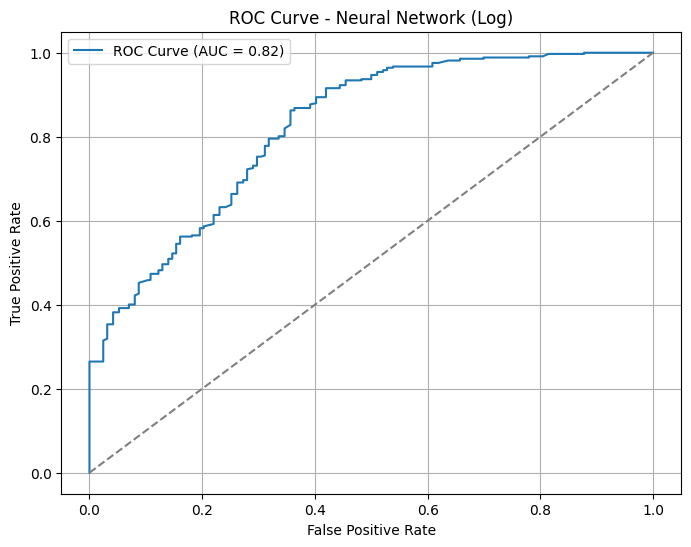

In [47]:
# create the nural network model # using the log classification
nn_model_log = MLPClassifier(hidden_layer_sizes=(12, 8), activation='relu', solver='adam', max_iter=1_000, learning_rate='adaptive')
nn_model_log.fit(X_log_df, y)
# Predict and evaluate
y_pred_log = nn_model_log.predict(X_log_df)
y_proba_log = nn_model_log.predict_proba(X_log_df)[:, 1]
# Metrics for log model
report_log = classification_report(y, y_pred_log, output_dict=True)
conf_matrix_log = confusion_matrix(y, y_pred_log)
accuracy_log = accuracy_score(y, y_pred_log)
fpr_log, tpr_log, thresholds_log = roc_curve(y, y_proba_log, pos_label=1)
roc_auc_log = auc(fpr_log, tpr_log)

print("Neural Network Log Classification Report:\n", report_log)
print("Confusion Matrix Log:\n", conf_matrix_log)
print("Accuracy Log:", accuracy_log)
print("ROC AUC Score Log:", roc_auc_log)
# Plot ROC curve for log model
plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, label=f'ROC Curve (AUC = {roc_auc_log:.2f})')
plt.plot([0, 1], [0, 1], '--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Neural Network (Log)")
plt.legend()
plt.grid(True)
plt.show()


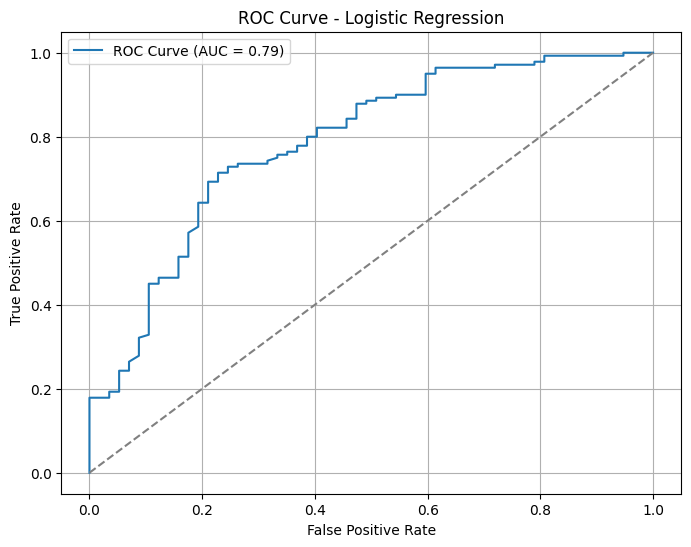

Logistic Regression Classification Report:
 {'0': {'precision': 0.6764705882352942, 'recall': 0.40350877192982454, 'f1-score': 0.5054945054945055, 'support': 57.0}, '1': {'precision': 0.7914110429447853, 'recall': 0.9214285714285714, 'f1-score': 0.8514851485148515, 'support': 140.0}, 'accuracy': 0.7715736040609137, 'macro avg': {'precision': 0.7339408155900398, 'recall': 0.662468671679198, 'f1-score': 0.6784898270046784, 'support': 197.0}, 'weighted avg': {'precision': 0.7581541601100594, 'recall': 0.7715736040609137, 'f1-score': 0.751376180737391, 'support': 197.0}}
Confusion Matrix:
 [[ 23  34]
 [ 11 129]]
Accuracy: 0.7715736040609137


In [39]:
# Train Logistic Regression model
log_model = LogisticRegression(max_iter=1000, solver='lbfgs', random_state=42)
log_model.fit(X_standardized_train, y_train)

# Predict and evaluate
y_pred_log = log_model.predict(X_standardized_test)
y_proba_log = log_model.predict_proba(X_standardized_test)[:, 1]

# Metrics
report_log = classification_report(y_test, y_pred_log, output_dict=True)
conf_matrix_log = confusion_matrix(y_test, y_pred_log)
accuracy_log = accuracy_score(y_test, y_pred_log)
fpr_log, tpr_log, thresholds_log = roc_curve(y_test, y_proba_log, pos_label=1)
roc_auc_log = auc(fpr_log, tpr_log)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, label=f'ROC Curve (AUC = {roc_auc_log:.2f})')
plt.plot([0, 1], [0, 1], '--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.grid(True)
plt.show()

print("Logistic Regression Classification Report:\n", report_log)
print("Confusion Matrix:\n", conf_matrix_log)
print("Accuracy:", accuracy_log)

## 🧾 Logistic Regression Classifier – Report

### 1. **Objective**

This section evaluates a **Logistic Regression** model applied to classify companies by their financial strength using normalized financial ratios.

* **Class 0**: Financially Weak
* **Class 1**: Financially Strong

---

### 2. **Model Configuration**

* **Algorithm**: Logistic Regression
* **Solver**: lbfgs
* **Max Iterations**: 1000
* **Feature Scaling**: StandardScaler applied to all input features
* **Training/Testing Split**: 80/20 stratified split

---

### 3. **Performance Evaluation**

#### 📊 Classification Report

| Class          | Precision | Recall | F1-score | Support |
| -------------- | --------- | ------ | -------- | ------- |
| **0 (Weak)**   | 0.68      | 0.40   | 0.51     | 57      |
| **1 (Strong)** | 0.79      | 0.92   | 0.85     | 140     |

* **Accuracy**: **77.2%**
* **Macro Avg F1-score**: 0.68
* **Weighted Avg F1-score**: 0.75

#### 📌 Confusion Matrix

|                   | Predicted Weak | Predicted Strong |
| ----------------- | -------------- | ---------------- |
| **Actual Weak**   | 23             | 34               |
| **Actual Strong** | 11             | 129              |

The model:

* Correctly classified **129 out of 140 strong companies**
* Correctly identified only **23 out of 57 weak companies**, indicating moderate difficulty in detecting the minority class

---

### 4. **ROC Curve Analysis**

* **AUC Score**: **0.79**

![ROC Curve](attachment)

*Interpretation*: The ROC curve rises well above the diagonal baseline, indicating that the model has good discriminatory ability between weak and strong companies based on predicted probabilities.

---

### 5. **Conclusion**

Logistic Regression performs well overall, with **solid accuracy and excellent recall for strong companies (92%)**. However, it struggles to detect financially weak companies, achieving only **40% recall** for that class. This limits its utility in risk-sensitive applications where missing weak companies is costly.

#### ✅ Strengths:

* Well-calibrated predicted probabilities (AUC = 0.79)
* Strong performance for majority class

#### ❌ Weaknesses:

* Poor recall and F1-score for the weak class (Class 0)
* Moderate class imbalance affects sensitivity

#### 📌 Recommendations:

* Improve model by:

  * Using class weights (`class_weight='balanced'`)
  * Applying resampling techniques (e.g., SMOTE)
  * Including interaction terms or polynomial features

